Fall 2024
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

DSAI 308, Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center"></h1>
<h1 align="center">Lab 10</h1>
<h1 align="center">RNN</h1>

---

# RNN - Predicting Monthly Sunspots

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
import math
import matplotlib.pyplot as plt


### Prepare dataset

In [ ]:
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

### RNN Model

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(layers.SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(layers.Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))


In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

### Process data

In [ ]:
sunspots_url = './monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
train_data

array([0.22852638, 0.24665089, 0.2758077 , ..., 0.3506698 , 0.4546887 ,
       0.4862096 ], dtype=float32)

### Train Model

In [ ]:
# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 2s - 8ms/step - loss: 0.0112
Epoch 2/20
187/187 - 1s - 3ms/step - loss: 0.0051
Epoch 3/20
187/187 - 0s - 2ms/step - loss: 0.0047
Epoch 4/20
187/187 - 0s - 2ms/step - loss: 0.0043
Epoch 5/20
187/187 - 1s - 3ms/step - loss: 0.0041
Epoch 6/20
187/187 - 1s - 7ms/step - loss: 0.0039
Epoch 7/20
187/187 - 1s - 4ms/step - loss: 0.0039
Epoch 8/20
187/187 - 1s - 6ms/step - loss: 0.0037
Epoch 9/20
187/187 - 0s - 2ms/step - loss: 0.0036
Epoch 10/20
187/187 - 1s - 3ms/step - loss: 0.0035
Epoch 11/20
187/187 - 1s - 3ms/step - loss: 0.0035
Epoch 12/20
187/187 - 1s - 3ms/step - loss: 0.0033
Epoch 13/20
187/187 - 0s - 2ms/step - loss: 0.0033
Epoch 14/20
187/187 - 0s - 2ms/step - loss: 0.0035
Epoch 15/20
187/187 - 1s - 3ms/step - loss: 0.0035
Epoch 16/20
187/187 - 1s - 3ms/step - loss: 0.0032
Epoch 17/20
187/187 - 0s - 2ms/step - loss: 0.0035
Epoch 18/20
187/187 - 0s - 2ms/step - loss: 0.0032
Epoch 19/20
187/187 - 1s - 3ms/step - loss: 0.0033
Epoch 20/20
187/187 - 0s - 2ms/step - loss: 0.0033


In [ ]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train RMSE: 0.058 RMSE
Test RMSE: 0.084 RMSE


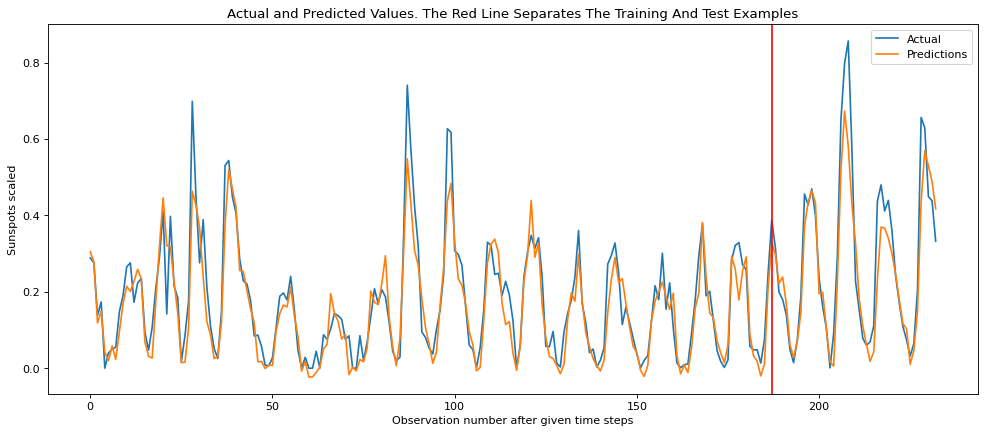

In [ ]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

# RNN - Text Generation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### Preparing Text

In [ ]:
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

### Create Sequence and Label

In [ ]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)

In [ ]:
#Convert Sequences and Labels to One-Hot Encoding
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

###

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1215 - loss: 2.8094
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1181 - loss: 2.7899 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1875 - loss: 2.7613
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1910 - loss: 2.7543
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2326 - loss: 2.7075 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2014 - loss: 2.7024
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2396 - loss: 2.6888
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2743 - loss: 2.6479  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2778 - loss: 2.6454 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3924 - loss: 2.6005 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3958 - loss: 2.5991 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3646 - l

In [ ]:
start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

## RNN Predicting next Character in HELLO

In [ ]:
from keras.utils import to_categorical

# Define the vocabulary and sequence
vocab = ['h', 'e', 'l', 'o']
vocab_size = len(vocab)
char_to_int = {char: idx for idx, char in enumerate(vocab)}
int_to_char = {idx: char for char, idx in char_to_int.items()}
char_to_int

{'h': 0, 'e': 1, 'l': 2, 'o': 3}

In [ ]:
int_to_char

{0: 'h', 1: 'e', 2: 'l', 3: 'o'}

In [ ]:

# Training sequence
sequence = "hello"
input_seq = [char_to_int[char] for char in sequence[:-1]]  # Input: "hell"
target_seq = [char_to_int[char] for char in sequence[1:]]  # Target: "ello"
input_seq, target_seq

([0, 1, 2, 2], [1, 2, 2, 3])

In [ ]:

# One-hot encoding
X = to_categorical(input_seq, num_classes=vocab_size)  # Shape: (4, vocab_size)
y = to_categorical(target_seq, num_classes=vocab_size)  # Shape: (4, vocab_size)
X, y

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]]),
 array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [ ]:

# Reshape X for RNN input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # Shape: (1, 4, vocab_size)
X, y

(array([[[1., 0., 0., 0.]],
 
        [[0., 1., 0., 0.]],
 
        [[0., 0., 1., 0.]],
 
        [[0., 0., 1., 0.]]]),
 array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [ ]:

# Build the model
model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(X.shape[1], X.shape[2])),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.5252
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2500 - loss: 1.5197
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2500 - loss: 1.5141
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2500 - loss: 1.5086
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2500 - loss: 1.5032
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.2500 - loss: 1.4977
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.2500 - loss: 1.4923
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.2500 - loss: 1.4869
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2500 - loss: 1.4815
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2500 - loss: 1.4762
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.2500 - loss: 1.4709
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.25

In [ ]:
# Predict the next character
prediction = model.predict(X)
predicted_char = [int_to_char[np.argmax(vec)] for vec in prediction]
print("Predicted sequence:", ''.join(predicted_char))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted sequence: eell


## RNN for Predicting the Next Number in a Sequence

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate a toy dataset: a sequence of numbers
def generate_sequence(length):
    return np.array(range(length))

# Create input-output pairs for the RNN
def create_dataset(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence) - window_size):
        X.append(sequence[i:i + window_size])
        y.append(sequence[i + window_size])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 100
window_size = 5
batch_size = 16
epochs = 20

# Generate the sequence
sequence = generate_sequence(sequence_length)
sequence

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:

# Prepare the dataset
X, y = create_dataset(sequence, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN input
X[0], y[0]

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 5)

In [ ]:

# Split into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:

# Build the RNN model
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(window_size, 1)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer predicts the next number
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)



Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 1883.2611 - mae: 38.8688 - val_loss: 5406.9087 - val_mae: 73.3979
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1579.1924 - mae: 35.8513 - val_loss: 4284.3896 - val_mae: 65.3367
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1190.5873 - mae: 30.5586 - val_loss: 3400.4590 - val_mae: 58.2078
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 963.5977 - mae: 27.6439 - val_loss: 2595.8647 - val_mae: 50.8584
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 684.3367 - mae: 23.2422 - val_loss: 1869.6935 - val_mae: 43.1636
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 562.5546 - mae: 21.3836 - val_loss: 1234.3241 - val_mae: 35.0718
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 350.3893 - mae: 16.9185 - val_loss: 688.6057 - val_mae: 26.1974
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.9373 - mae: 12.4434 - val_loss: 281.7438 - val_mae: 16.7596
Epoch 9/20
5/5 ━━━━━━━

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.9889 - mae: 1.7137
Test Loss: 2.9888973236083984, Test MAE: 1.7137117385864258


In [ ]:

# Predict the next number in a new sequence
new_sequence = np.array([95, 96, 97, 98, 99])  # Example input
new_sequence = new_sequence.reshape((1, window_size, 1))
predicted_number = model.predict(new_sequence)
print(f"Predicted next number: {predicted_number[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted next number: 102.13


## Lab Practice:
For the first RNN, add more layers and compare different losses